# Notebook 02: Preprocessing and Training Data Development
The purpose of this notebook is to run through the steps of preparing data to use for fitting models in the next step.

The two datasets that are going to be used initially for semantically segmenting drone footage, are the two static image datasets titled:
1. Varied Drone Dataset for Semantic Segmentation
2. Semantic Drone Dataset

The following code will use the naming conventions:
1. Varied Drone Dataset (VDD)
2. Semantic Drone Dataset (SDD)

### Imports

In [1]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from collections import Counter
from PIL import Image
from itertools import chain
import random

### Functions

In [2]:
# function to load image data into a list
def load_images_from_folder(folder_path, flags=cv2.IMREAD_COLOR, new_size=None):
    # initialize list
    image_dataset = []
    image_shape = []
    # load each image in folder
    for image_file in tqdm(os.listdir(folder_path)):
        # load as grayscale or color
        image_data = cv2.imread(folder_path + image_file, flags=flags)  # stored in BGR (not RGB)
        # record image shape
        image_shape.append(image_data.shape)
        # resize image
        if new_size is not None:
            image_data = cv2.resize(image_data, new_size, interpolation=0)  # downsizing images saves memory and time, using nearest neighbor interpolation to prevent color interpolation of some pixels
        # convert BGR to RGB
        if len(image_data.shape) == 3:
            image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)  # convert to RGB
        # record image data
        image_dataset.append(image_data)
        
    # calcualte image aspect ratio
    image_aspect_ratio = [float(i[1] / i[0]) for i in image_shape]
    
    return image_dataset, np.unique(image_shape), np.unique(image_aspect_ratio)

### Define data paths

#### Varied Drone Dataset

In [3]:
# VDD Train Source Images
file_path_VDD_train_src = '../data/VDD/train/src/'

# VDD Train Ground Truth Images
file_path_VDD_train_gt = '../data/VDD/train/gt/'

# VDD Validation Source Images
file_path_VDD_val_src = '../data/VDD/val/src/'

# VDD Validation Ground Truth Images
file_path_VDD_val_gt = '../data/VDD/val/gt/'

# VDD Test Source Images
file_path_VDD_test_src = '../data/VDD/test/src/'

# VDD Test Ground Truth Images
file_path_VDD_test_gt = '../data/VDD/test/gt/'

#### Semantic Drone Dataset

In [4]:
# SDD Source Images
file_path_SDD_src = '../data/semantic_drone_dataset/training_set/images/'

# SDD Ground Truth Images
file_path_SDD_gt = '../data/semantic_drone_dataset/training_set/gt/semantic/label_images/'

### Load images

#### Varied Drone Dataset
We know that the VDD ground truth masked images are grayscale from notebook 01.

In [5]:
# import images
VDD_train_src, VDD_train_src_shape, VDD_train_src_aspect_ratio = load_images_from_folder(file_path_VDD_train_src, new_size=(600, 400))
VDD_train_gt,  VDD_train_gt_shape,  VDD_train_gt_aspect_ratio  = load_images_from_folder(file_path_VDD_train_gt,  new_size=(600, 400), flags=cv2.IMREAD_GRAYSCALE)
VDD_val_src,   VDD_val_src_shape,   VDD_val_src_aspect_ratio   = load_images_from_folder(file_path_VDD_val_src,   new_size=(600, 400))
VDD_val_gt,    VDD_val_gt_shape,    VDD_val_gt_aspect_ratio    = load_images_from_folder(file_path_VDD_val_gt,    new_size=(600, 400), flags=cv2.IMREAD_GRAYSCALE)
VDD_test_src,  VDD_test_src_shape,  VDD_test_src_aspect_ratio  = load_images_from_folder(file_path_VDD_test_src,  new_size=(600, 400))
VDD_test_gt,   VDD_test_gt_shape,   VDD_test_gt_aspect_ratio   = load_images_from_folder(file_path_VDD_test_gt,   new_size=(600, 400), flags=cv2.IMREAD_GRAYSCALE)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 27.69it/s]


In [6]:
# convert to numpy arrays
VDD_train_src = np.array(VDD_train_src)
VDD_train_gt = np.array(VDD_train_gt)
VDD_val_src = np.array(VDD_val_src)
VDD_val_gt = np.array(VDD_val_gt)
VDD_test_src = np.array(VDD_test_src)
VDD_test_gt = np.array(VDD_test_gt)

#### Semantic Drone Dataset

In [7]:
# import images
SDD_src, SDD_src_shape, SDD_src_aspect_ratio = load_images_from_folder(file_path_SDD_src, new_size=(400, 300))
SDD_gt,  SDD_gt_shape,  SDD_gt_aspect_ratio  = load_images_from_folder(file_path_SDD_gt, new_size=(400, 300))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:59<00:00,  6.71it/s]


In [8]:
# convert to numpy arrays
SDD_src = np.array(SDD_src)
SDD_gt = np.array(SDD_gt)

### Sanity check: are the images loaded correctly?

#### Varied Drone Dataset

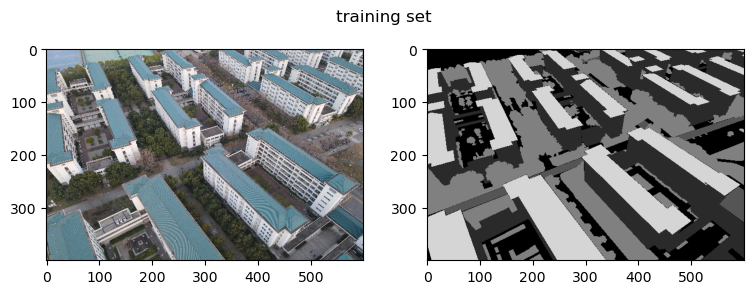

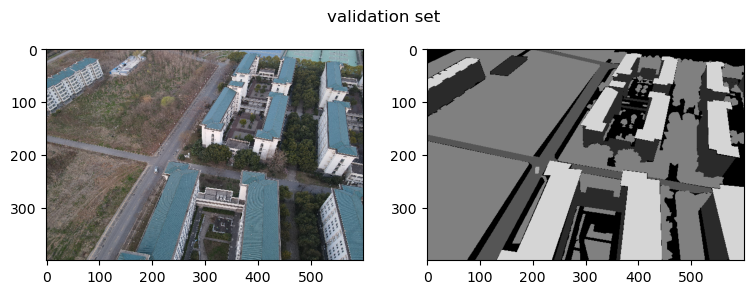

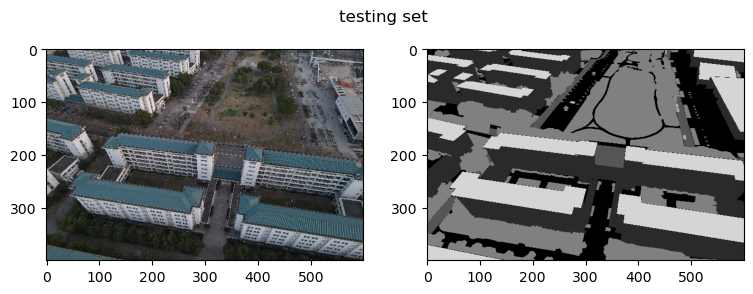

In [9]:
# ----- train -----
# view sample image and mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

# train
axs[0].imshow(VDD_train_src[0])
axs[1].imshow(VDD_train_gt[0], cmap='gray', vmin=0, vmax=6)

# label and show
fig.suptitle('training set')
plt.show()

# ----- validation -----
# view sample image and mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

# train
axs[0].imshow(VDD_val_src[0])
axs[1].imshow(VDD_val_gt[0], cmap='gray', vmin=0, vmax=6)

# label and show
fig.suptitle('validation set')
plt.show()

# ----- test -----
# view sample image and mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

# train
axs[0].imshow(VDD_test_src[0])
axs[1].imshow(VDD_test_gt[0], cmap='gray', vmin=0, vmax=6)

# label and show
fig.suptitle('testing set')
plt.show()

#### Semantic Drone Dataset

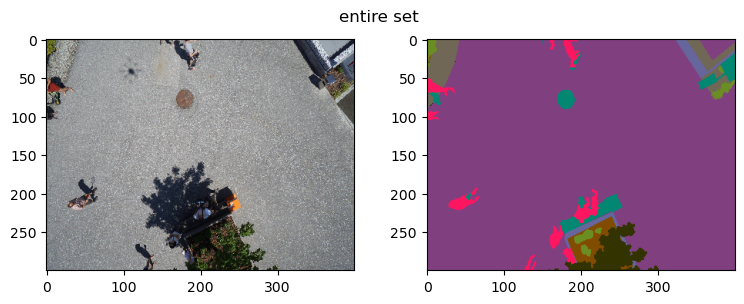

In [10]:
# ----- train -----
# view sample image and mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

# train
axs[0].imshow(SDD_src[0])
axs[1].imshow(SDD_gt[0], cmap='gray', vmin=0, vmax=6)

# label and show
fig.suptitle('entire set')
plt.show()

The images are loaded in correctly. The VDD masks are in grayscale and the SDD masks are in RGB.

### Check for uniform image shapes and aspect ratios across datasets

#### Varied Drone Dataset

In [11]:
# check shapes
print('Unique VDD image shapes:')
VDD_image_shapes = [VDD_train_src_shape, VDD_train_gt_shape, VDD_val_src_shape, VDD_val_gt_shape, VDD_test_src_shape, VDD_test_gt_shape]
print([x for x in set(tuple(x) for x in VDD_image_shapes)])

# check aspect ratios
print('\nUnique VDD image aspect ratios:')
print(np.unique(VDD_train_src_aspect_ratio + VDD_train_gt_aspect_ratio + VDD_val_src_aspect_ratio + VDD_val_gt_aspect_ratio + VDD_test_src_aspect_ratio + VDD_test_gt_aspect_ratio))

Unique VDD image shapes:
[(3, 3000, 4000), (3000, 4000)]

Unique VDD image aspect ratios:
[8.]


#### Semantic Drone Dataset

In [12]:
# check shapes
print('Unique SDD image shapes:')
SDD_image_shapes = [SDD_src_shape, SDD_gt_shape]
print([x for x in set(tuple(x) for x in SDD_image_shapes)])

# check aspect ratios
print('\nUnique SDD image aspect ratios:')
print(np.unique(SDD_src_aspect_ratio + SDD_gt_aspect_ratio))

Unique SDD image shapes:
[(3, 4000, 6000)]

Unique SDD image aspect ratios:
[3.]


Note that the VDD dataset's images are in RGB and the masks are in grayscale. Each dataset has its own unique image shape and aspect ratio. Since they do not match, image shape and aspect ratio will become hyperparameters and each dataset will be scaled accordingly. Since image shape and aspect ratio are not mutually exclusive, image shape will be the one chosen since it also carries information about image dimensions. However, before this is done, the masks between datasets must have equal values.

### Common Masking Values

#### Master mask

In [13]:
Master_mask = {}
Master_mask['unlabeled'] = 0
Master_mask['wall'] = 1
Master_mask['roof'] = 2
Master_mask['road'] = 3
Master_mask['water'] = 4
Master_mask['car'] = 5
Master_mask['vegetation'] = 6

In [14]:
# create Master data folder if DNE
file_path_Master = '../data/Master/'
file_path_Master_src = file_path_Master + 'src/'
file_path_Master_gt = file_path_Master + 'gt/'
if not os.path.isdir(file_path_Master):
    os.mkdir(file_path_Master)
    os.mkdir(file_path_Master_src)
    os.mkdir(file_path_Master_gt)
    print('Master data folder created!')
else:
    print('Master data folder already exists!')

Master data folder already exists!


#### Varied Drone Dataset

The website for VDD claims the images are labeled into 7 categories: Wall, Roof, Road, Water, Vehicle, Vegetation and Others. Unfortunately, I cannot find information on which color values denote which class, so I will define the class labels myself.

*Highlight examples of each class*

In [15]:
# unique grayscale labels in VDD
VDD_test_gt = np.array(VDD_test_gt)
unique_labels = np.unique(VDD_test_gt)
print(unique_labels)

[0 1 2 3 4 5 6]


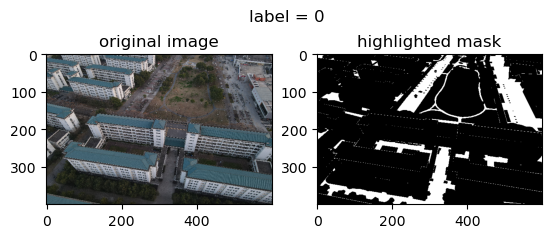

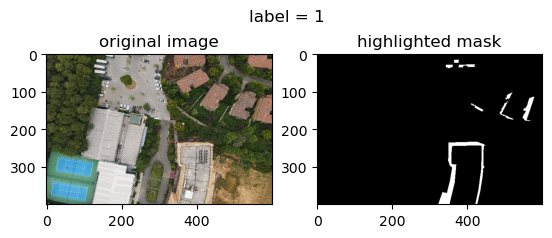

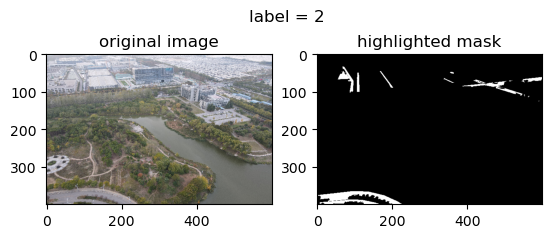

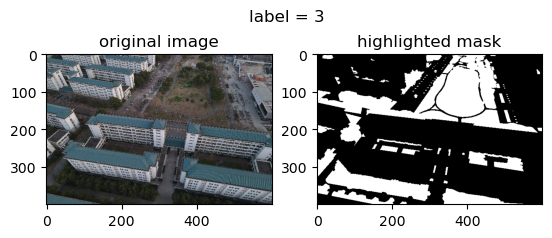

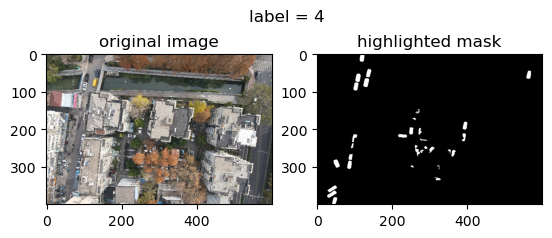

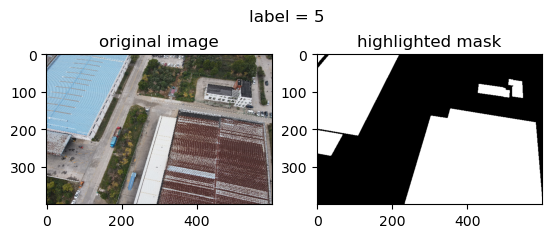

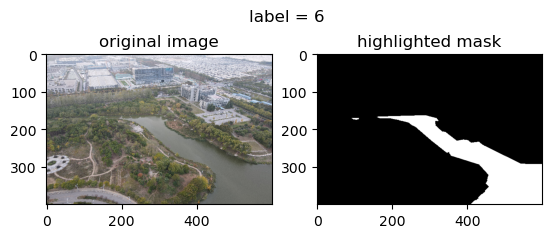

In [16]:
# for each unique label
for x in unique_labels:
    # create new figure
    fig, axs = plt.subplots(nrows=1, ncols=2)
    
    # for each image mask
    while True:
        # get random image
        i = random.randrange(0,VDD_test_gt.shape[0])
        
        # assign mask and image data
        mask = VDD_test_gt[i]
        image = VDD_test_src[i]
        
        # find x label example
        if x in mask:
            # plot original image
            axs[0].imshow(image)
            axs[0].title.set_text('original image')
            
            # create highlighted image
            highlighted_mask = mask.copy()
            highlighted_mask[mask == x] = 1
            highlighted_mask[mask != x] = 0
            
            # plot highlighted image
            axs[1].imshow(highlighted_mask, cmap='gray', vmin=0, vmax=1)
            axs[1].title.set_text('highlighted mask')
            
            # title subplots and show
            plt.suptitle(f'label = {x}')
            plt.subplots_adjust(top=1.35)
            plt.show()
            break

From the class examples plotted above, it looks like the VDD classes should be defined as follows:
* class 0: others
* class 1: wall
* class 2: road
* class 3: vegetation
* class 4: vehicle
* class 5: roof
* class 6: water

In [17]:
# transformation dictionary: VDD to Master
VDD_to_Master = {}
VDD_to_Master['unlabeled'] = 0
VDD_to_Master['wall'] = 1
VDD_to_Master['road'] = 2
VDD_to_Master['vegetation'] = 3
VDD_to_Master['car'] = 4
VDD_to_Master['roof'] = 5
VDD_to_Master['water'] = 6

*Save each image and transformed mask from VDD in to Master folder*

In [21]:
# test data
ibase = 0
for i, data in tqdm(enumerate(VDD_test_gt)):
    # save src image
    src_img = Image.fromarray(VDD_test_src[i])
    src_img.save(file_path_Master_src + str(i) + '.jpeg')
    
    # create Master gt mask
    gt_array = VDD_test_gt[i].copy()
    for k, v in VDD_to_Master.items():
        gt_array[VDD_test_gt[i]==v] = Master_mask[k]
        
    # save gt mask
    gt_img = Image.fromarray(gt_array)
    gt_img.save(file_path_Master_gt + str(i) + '.jpeg')

# validation data
ibase = i + ibase + 1
for i, data in tqdm(enumerate(VDD_val_gt)):
    # save src image
    src_img = Image.fromarray(VDD_val_src[i])
    src_img.save(file_path_Master_src + str(i+ibase) + '.jpeg')
    
    # create Master gt mask
    gt_array = VDD_val_gt[i].copy()
    for k, v in VDD_to_Master.items():
        gt_array[VDD_val_gt[i]==v] = Master_mask[k]
        
    # save gt mask
    gt_img = Image.fromarray(gt_array)
    gt_img.save(file_path_Master_gt + str(i+ibase) + '.jpeg')

# train data
ibase = i + ibase + 1
for i, data in tqdm(enumerate(VDD_train_gt)):
    # save src image
    src_img = Image.fromarray(VDD_train_src[i])
    src_img.save(file_path_Master_src + str(i+ibase) + '.jpeg')
    
    # create Master gt mask
    gt_array = VDD_train_gt[i].copy()
    for k, v in VDD_to_Master.items():
        gt_array[VDD_train_gt[i]==v] = Master_mask[k]
        
    # save gt mask
    gt_img = Image.fromarray(gt_array)
    gt_img.save(file_path_Master_gt + str(i+ibase) + '.jpeg')

40it [00:00, 156.57it/s]
80it [00:00, 164.21it/s]
280it [00:01, 152.51it/s]


#### Semantic Drone Dataset

In [20]:
# get mask labels
SDD_mask_labels = pd.read_csv('../data/semantic_drone_dataset/training_set/gt/semantic/class_dict.csv')
SDD_mask_labels['rgb'] = list(zip(SDD_mask_labels[' r'], SDD_mask_labels[' g'], SDD_mask_labels[' b']))
SDD_mask_labels.drop(columns=[' r', ' g', ' b'], inplace=True)
SDD_mask_labels

,name,rgb
0,unlabeled,"(0, 0, 0)"
1,paved-area,"(128, 64, 128)"
2,dirt,"(130, 76, 0)"
3,grass,"(0, 102, 0)"
4,gravel,"(112, 103, 87)"
5,water,"(28, 42, 168)"
6,rocks,"(48, 41, 30)"
7,pool,"(0, 50, 89)"
8,vegetation,"(107, 142, 35)"
9,roof,"(70, 70, 70)"


### Hyperparameter 1: image shape

In [ ]:
# list of aspect ratios to be tested
ars = [1, 1.33, 1.5]

# list of default image sizes to test before scaling aspect ratio
# [(64, 64), (128, 128), (256, 256), (512, 512), (1024, 1024)]
default_image_sizes = [(2**i, 2**i) for i in range(6,11)]

# list of images shapes to be tested as a hyperparameter
# (height in pixels, width in pixels)
hp_image_shapes = []
for ar in ars:
    hp_image_shapes.extend([(i, round(j*ar)) for i, j in default_image_sizes])

# create folder name codes for dims, aspect ratio, train, val, test